# Exercise 1: Optimize lepton selection

* First, print the distributions of the relevant variables for *all* the Monte Carlo samples (i.e. all the *channels* of the $Z$-boson decay to be studied). Which variables are these? Give sensible ranges to include all the events in the samples (both MC and OPAL data) 
* Do the same for **one** of the OPAL data samples (your lab assistant will decide which one you choose).
* Describe the results.
* Optimize the object selection by applying cuts. Make a strategy on how to proceed to find the optimal selection. which information do you need?
* Determine the efficiency and the amount of background for each $Z$ decay channel. Use the simulated events $e^+e^-$, $\mu^+\mu^-$, $\tau^+\tau^-$ and hadrons ($qq$). Represent the result in a matrix form and think carefully about how you have to correct the measured rates. Don't forget to calculate the errors!
* How do we estimate the statistical fluctuations per bin?

#### Import libraries

In [1]:
import uproot
import awkward as ak
import mplhep
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

#### Load the data

In [2]:
### Specify the folder path for MC samples
path_data = 'data/'

### Open the file introducing file path
mc_data_ee = uproot.open(path_data+'ee.root')
mc_data_mm = uproot.open(path_data+'mm.root')
mc_data_qq = uproot.open(path_data+'qq.root')
mc_data_tt = uproot.open(path_data+'tt.root')
ttree_name = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
mc_data_ee[ttree_name].keys()
#print(mc_data_ee[ttree_name].keys())

### Load branches
branches_ee = mc_data_ee[ttree_name].arrays()
branches_mm = mc_data_mm[ttree_name].arrays()
branches_qq = mc_data_qq[ttree_name].arrays()
branches_tt = mc_data_tt[ttree_name].arrays()

### List of variables (of interest)
vars=['Pcharged', 'Ncharged', 'E_ecal', 'E_hcal']

###
Pchar=ak.Array([branches_ee[vars[0]],branches_mm[vars[0]],branches_qq[vars[0]],branches_tt[vars[0]]])
Nchar=ak.Array([branches_ee[vars[1]],branches_mm[vars[1]],branches_qq[vars[1]],branches_tt[vars[1]]])
E_ecal=ak.Array([branches_ee[vars[2]],branches_mm[vars[2]],branches_qq[vars[2]],branches_tt[vars[2]]])
E_hcal=ak.Array([branches_ee[vars[3]],branches_mm[vars[3]],branches_qq[vars[3]],branches_tt[vars[3]]])


print(ak.to_numpy(E_hcal[0]).max())
print(ak.to_numpy(E_hcal[0]).min())
print(ak.to_numpy(E_hcal[0]).mean())
print(ak.to_numpy(E_hcal[0]).std())

82.45000457763672
0.0
0.7904596871724947
1.8916810893347085


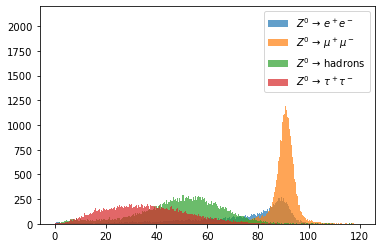

In [3]:
labels=[r'$Z^0$ $\to$ $e^+e^-$',r'$Z^0$ $\to$ $\mu^+\mu^-$',r'$Z^0$ $\to$ hadrons',r'$Z^0$ $\to$ $\tau^+\tau^-$']

for i in np.arange(4):
    plt.hist(ak.to_numpy(Pchar[i]),bins=np.arange(0,120,0.1),label=labels[i],alpha=0.7)

plt.ylim(0,2200)
plt.legend()
plt.show()

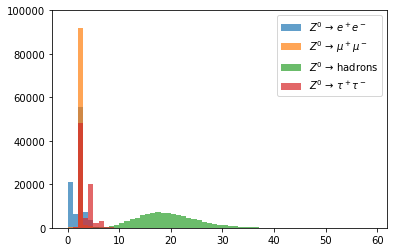

In [4]:
for i in np.arange(4):
    plt.hist(ak.to_numpy(Nchar[i]),bins=np.arange(0,60,1),label=labels[i],alpha=0.7)

plt.ylim(0,100000)
plt.legend()
plt.show()

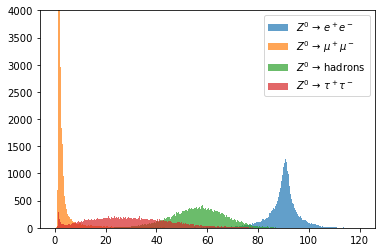

In [5]:
for i in np.arange(4):
    plt.hist(ak.to_numpy(E_ecal[i]),bins=np.arange(0,120,0.1),label=labels[i],alpha=0.7)

plt.ylim(0,4000)
plt.legend()
plt.show()

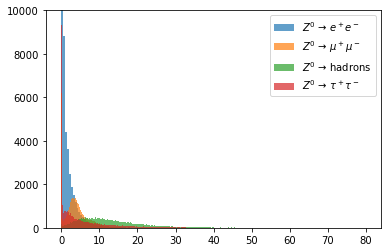

In [6]:
plt.hist(ak.to_numpy(E_hcal[0]),bins=np.arange(0,80,0.5),label=labels[0],alpha=0.7)
for i in np.array([1,2,3]):
    plt.hist(ak.to_numpy(E_hcal[i]),bins=np.arange(0,80,0.08),label=labels[i],alpha=0.7)
    
plt.ylim(0,10000)
plt.legend()
plt.show()